In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Exploratory Data Analysis

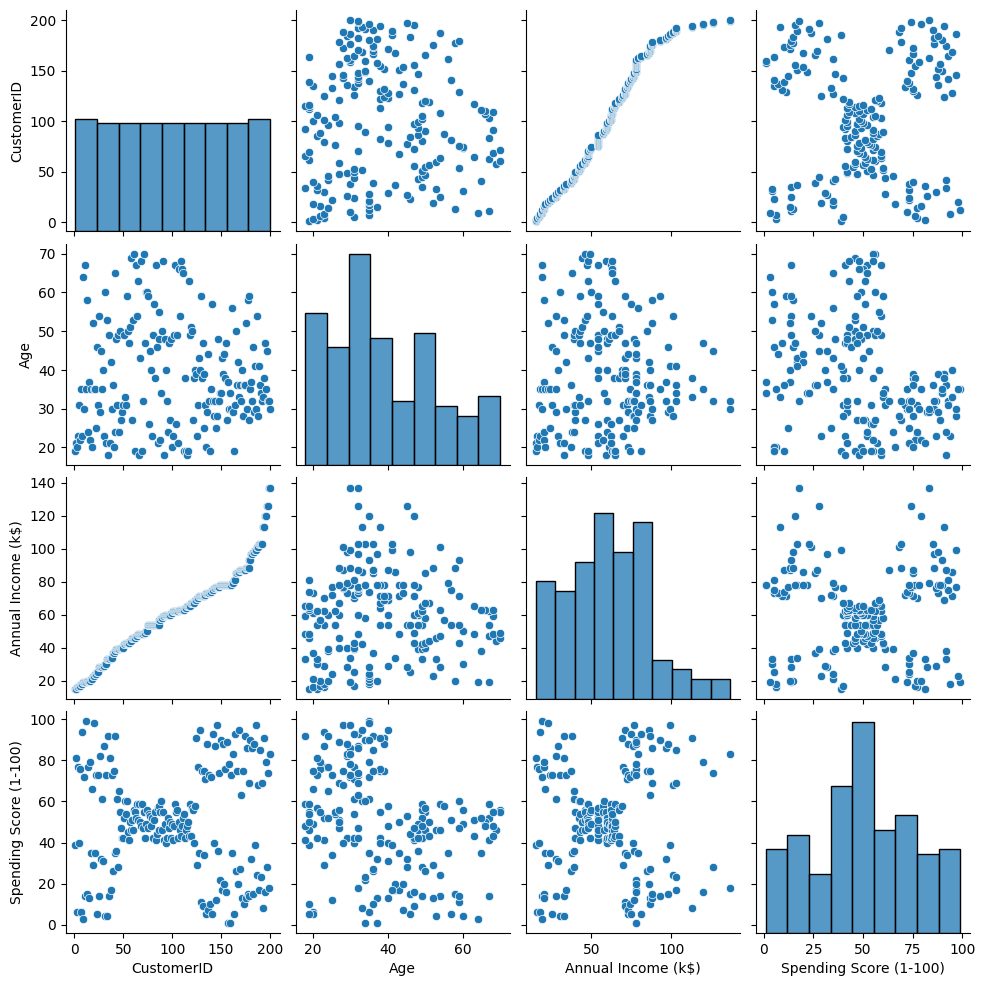

In [7]:
sns.pairplot(df)
plt.show()

Customer id is not correlated with income, it's not an useful feature so we can remove that.

In [8]:
df.drop(columns=['CustomerID'], inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


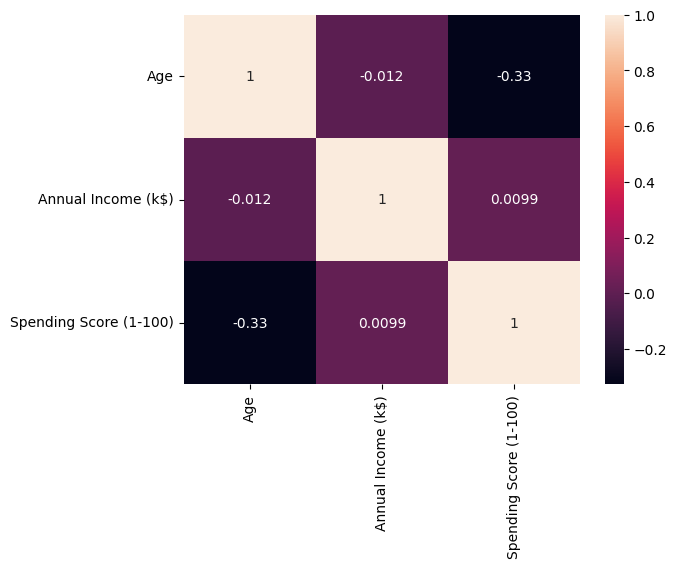

In [10]:
sns.heatmap(df[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr(), annot=True)
plt.show()

In [11]:
size=df['Gender'].value_counts()
print(size)

Female    112
Male       88
Name: Gender, dtype: int64


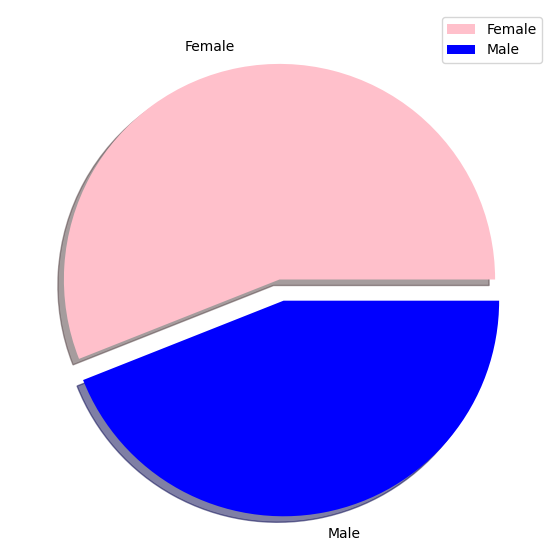

In [12]:
plt.figure(figsize=(7,7))
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

From the diagram we can say that females are more visiting to mall than males

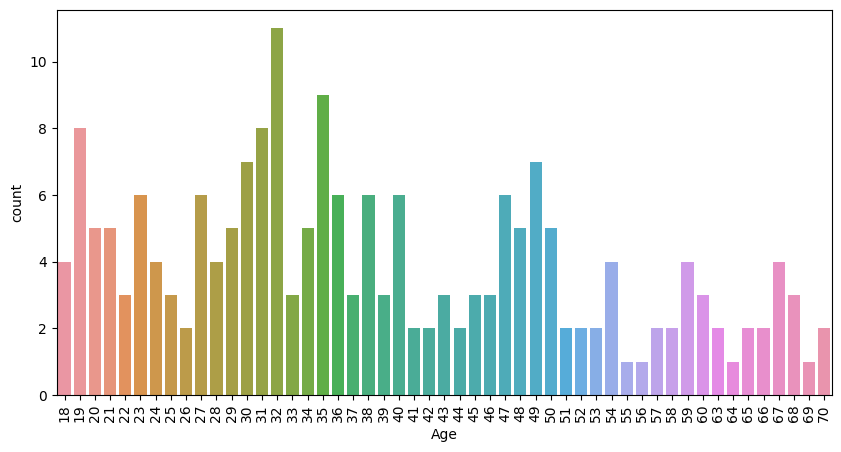

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['Age'])
plt.xticks(rotation=90)
plt.show()

Peoples of age between 25 to 40 are mostly visiting mall than other age groups



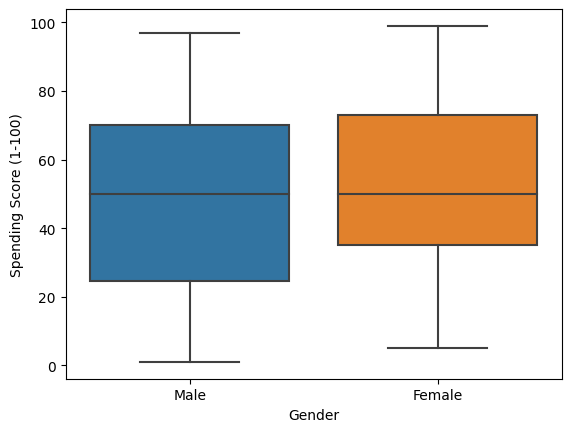

In [14]:
sns.boxplot(df['Gender'],df['Spending Score (1-100)'])
plt.show()

This diagram shows the mean spendscore of female and male. we can observe that the mean average spend score of female is greater than male, they have higher spendscore than male,and their least spendscore is greater than males least spendscore.



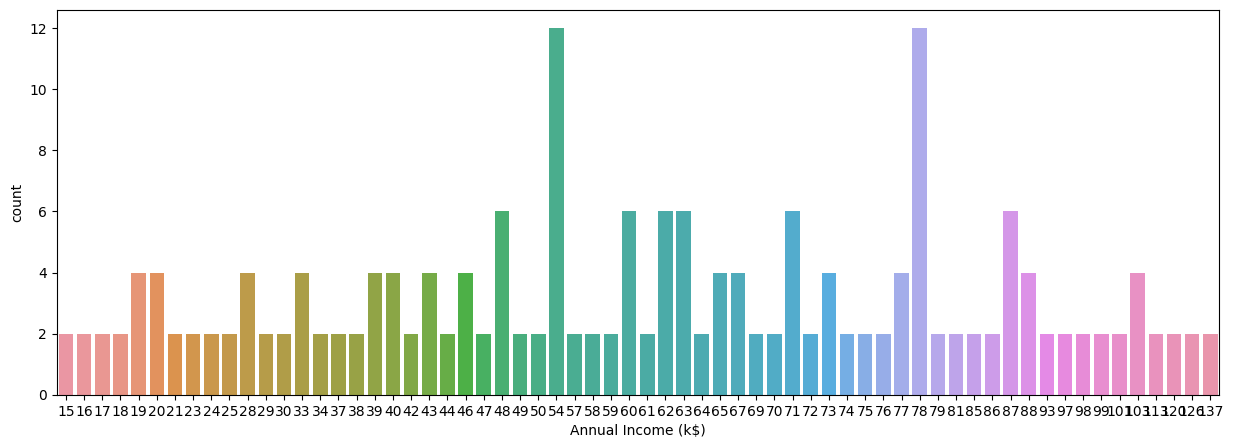

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df["Annual Income (k$)"])
plt.show()

Peoples of salary 54k and 78k are the mostly visited persons in mall.



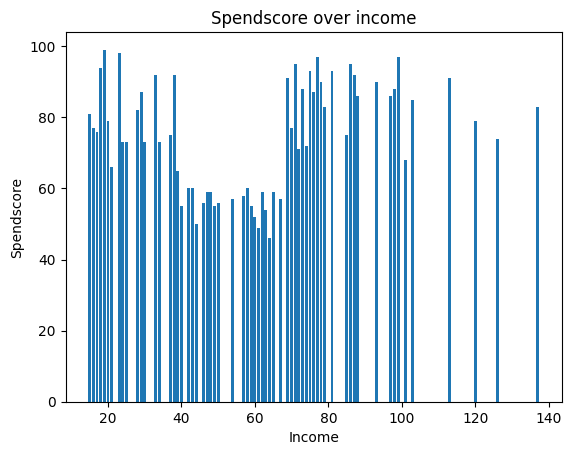

In [16]:
plt.bar(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.title('Spendscore over income')
plt.xlabel('Income')
plt.ylabel('Spendscore')
plt.show()

Peoples of income in the range of 20k-40k and 70k-100k have the highest spend score.

### Clustering

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
x=df.iloc[:,[2,3]].values

In [19]:
x.shape

(200, 2)

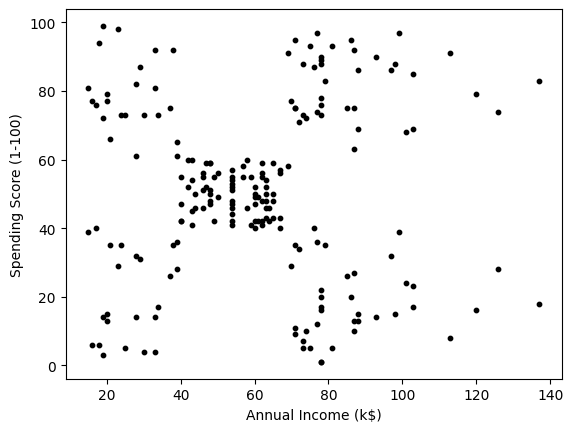

In [20]:
# Scatterplot between Annual Income and Spending Score
plt.scatter(x[:,0],x[:,1],s=10, c = "black")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

We use elbow method to find optimal number of clusters. In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

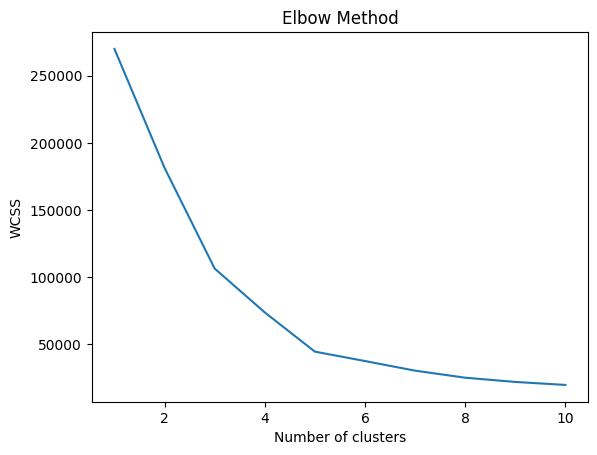

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [24]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

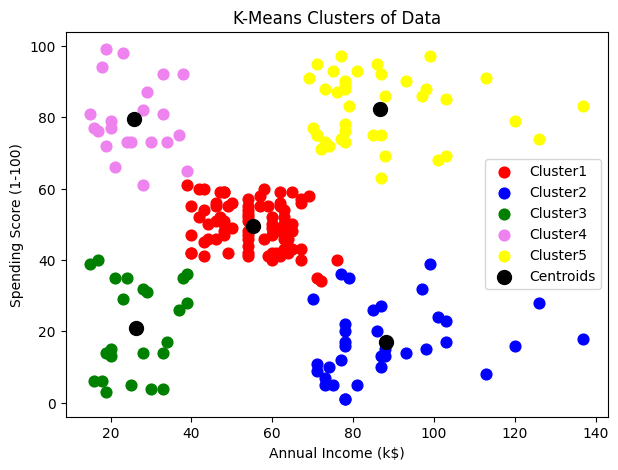

In [25]:
plt.figure(figsize=(7,5))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('K-Means Clusters of Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() 

plt.show()

#### Density Based Spacial Clustering of Applications with noise (DBSCAN)

We are going to use the DBSCAN for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.

In [26]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=5,min_samples=5,metric='euclidean')

In [27]:
model=db.fit(x)
model

DBSCAN(eps=5)

In [28]:
label = pd.DataFrame(model.labels_)
label.value_counts()

-1    87
 1    78
 2    10
 4    10
 3     9
 0     6
dtype: int64

In [29]:
y_means = db.fit_predict(x)
y_means

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [30]:
x[y_means==4,0]

array([71, 73, 75, 76, 77, 78, 78, 78, 79, 81], dtype=int64)

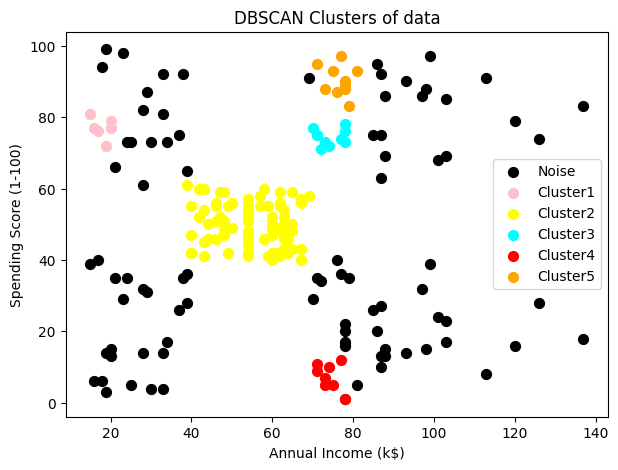

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == -1, 0], x[y_means == -1, 1], s = 50, c = 'black', label = 'Noise')

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink', label = 'Cluster1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow', label = 'Cluster2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan', label = 'Cluster3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'red', label = 'Cluster4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange', label = 'Cluster5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clusters of data')
plt.legend()
plt.show()